In [0]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from google.colab import drive

import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017)

drive.mount('/content/gdrive')
dir="/content/gdrive/My Drive/Colab Notebooks/EVA2/Weights/"
!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
gdrive	sample_data


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
print(train_features.shape)
print(test_features.shape)

num_train, img_rows, img_cols, img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape

# num_classes=10
num_classes = len(np.unique(train_labels))
print(num_train, num_test, img_channels)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
50000 10000 3


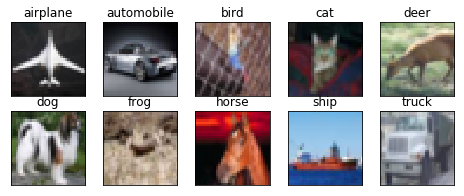

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))

for i in range(num_classes): #0-9
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])    
    idx = np.where(train_labels[:]==i)[0] #rows from training whose label=i, [1] gives the columns
    
    features_idx = train_features[idx,::] # shape:(5000, 32, 32, 3)
    img_num = np.random.randint(features_idx.shape[0]) #pick a random number from 0-5000
    im = features_idx[img_num]
    
    ax.set_title(class_names[i])
    plt.imshow(im)
    
plt.show()

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

### Original model

In [0]:
# Define the model
model = Sequential()
model.add(Conv2D(48, (3, 3), border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Conv2D(96, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Conv2D(192, 3, 3))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_25 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_26 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 96)        41568     
__________

#### Original model : best validation accuracy is 83.18% at epoch 92, when training acc is 89.71%

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)
batch_size = 128

train_gen = datagen.flow(train_features, train_labels, batch_size = batch_size)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(train_gen, steps_per_epoch=len(train_gen),
                                 validation_data = (test_features, test_labels),
                                 epochs = 100, verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

Epoch 1/100
391/391 [==============================] - 21s 55ms/step - loss: 1.9825 - acc: 0.2422 - val_loss: 1.6117 - val_acc: 0.3985
Epoch 2/100
391/391 [==============================] - 20s 51ms/step - loss: 1.4942 - acc: 0.4484 - val_loss: 1.2901 - val_acc: 0.5268
Epoch 3/100
391/391 [==============================] - 20s 52ms/step - loss: 1.2584 - acc: 0.5475 - val_loss: 1.1149 - val_acc: 0.6006
Epoch 4/100
391/391 [==============================] - 20s 52ms/step - loss: 1.1096 - acc: 0.6069 - val_loss: 1.0705 - val_acc: 0.6314
Epoch 5/100
391/391 [==============================] - 20s 52ms/step - loss: 1.0072 - acc: 0.6481 - val_loss: 0.9147 - val_acc: 0.6806
Epoch 6/100
391/391 [==============================] - 20s 51ms/step - loss: 0.9325 - acc: 0.6761 - val_loss: 0.8640 - val_acc: 0.6970
Epoch 7/100
391/391 [==============================] - 20s 52ms/step - loss: 0.8596 - acc: 0.7031 - val_loss: 0.7704 - val_acc: 0.7331
Epoch 8/100
391/391 [==============================] - 

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(10,4))
    
    # Plot training & validation accuracy values
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    #axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Plot training & validation loss values
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    #axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    print(result.shape)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

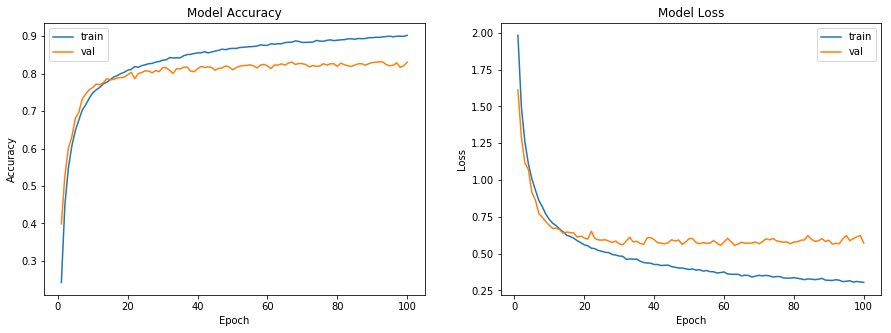

(10000, 10)
Accuracy on test data is: 83.08


In [0]:
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#### Added (1,1) conv before max-pooling layers as transition block. There are 3 such blocks. For 30 epochs, best validation accuracy is 80.82% at epoch 22, when training acc is 90.34%

In [0]:
def build_model():
  model = Sequential()
  model.add(Conv2D(48, (3, 3), border_mode='same', input_shape=(32, 32, 3))) #rf 3
  model.add(Activation('relu'))  
  model.add(Conv2D(96, 3, border_mode='same')) 
  model.add(Activation('relu'))
  
  model.add(Conv2D(64, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #16, rf10
  model.add(Dropout(0.25))

  model.add(Conv2D(96, 3, border_mode='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(192, 3, border_mode='same')) #16, rf14
  model.add(Activation('relu'))
  
  model.add(Conv2D(128, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #8, rf28
  model.add(Dropout(0.25))

  model.add(Conv2D(192, 3, border_mode='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(384, 3, 3, border_mode='same'))#8, rf32
  model.add(Activation('relu'))
  
  model.add(Conv2D(200, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #4, rf64
  model.add(Dropout(0.25))
  
  model.add(Conv2D(100, 1))
  model.add(Activation('relu'))
  model.add(Conv2D(10, 4))
    
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [0]:
model=build_model()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, 3, padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, 3, padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, 3, padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ip

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_81 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 32, 32, 96)        41568     
_________________________________________________________________
activation_82 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 32, 32, 64)        6208      
_________________________________________________________________
activation_83 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 64)        0         
__________

In [0]:
model.fit(train_features, train_labels, batch_size=128, epochs=30, verbose=1,
          validation_data=(test_features, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 40s 804us/step - loss: 1.8701 - acc: 0.3033 - val_loss: 1.4456 - val_acc: 0.4654
Epoch 2/30
50000/50000 [==============================] - 38s 763us/step - loss: 1.3047 - acc: 0.5259 - val_loss: 1.1066 - val_acc: 0.6069
Epoch 3/30
50000/50000 [==============================] - 38s 764us/step - loss: 1.0441 - acc: 0.6272 - val_loss: 0.9573 - val_acc: 0.6637
Epoch 4/30
50000/50000 [==============================] - 38s 762us/step - loss: 0.9058 - acc: 0.6787 - val_loss: 0.8801 - val_acc: 0.6887
Epoch 5/30
50000/50000 [==============================] - 38s 760us/step - loss: 0.8088 - acc: 0.7170 - val_loss: 0.7976 - val_acc: 0.7211
Epoch 6/30
50000/50000 [==============================] - 38s 764us/step - loss: 0.7199 - acc: 0.7465 - val_loss: 0.7252 - val_acc: 0.7483
Epoch 7/30
50000/50000 [==============================] - 38s 765us/step - loss: 0.6589 - acc: 0.7692 - val_loss: 0.

#### Changed dropouts - added after every conv layer of (3,3) kernel with reduced amount of 0.1. For 30 epochs, best validation accuracy is 80.8% at epoch 20, when training acc is 92.36%. This was better than adding larger dropout only for conv layers with bigger channels.

In [0]:
def build_second_model():
  model = Sequential()
  model.add(Conv2D(48, (3, 3), padding='same', input_shape=(32, 32, 3))) #rf 3
  model.add(Activation('relu'))
  model.add(Dropout(0.1))
  model.add(Conv2D(96, 3, padding='same')) 
  model.add(Activation('relu'))
  model.add(Dropout(0.1))
  
  model.add(Conv2D(64, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #16, rf10
  

  model.add(Conv2D(96, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.1))
  model.add(Conv2D(192, 3, padding='same')) #16, rf14
  model.add(Activation('relu'))
  model.add(Dropout(0.1))
  
  model.add(Conv2D(128, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #8, rf28
  
  model.add(Conv2D(192, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(Dropout(0.1))
  model.add(Conv2D(384, 3, 3, padding='same'))#8
  model.add(Activation('relu'))
  model.add(Dropout(0.1))
  
  model.add(Conv2D(200, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #4
  #model.add(Dropout(0.25))
  
  model.add(Conv2D(100, 1))
  model.add(Activation('relu'))
  model.add(Conv2D(10, 4))
    
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [0]:
model=build_second_model()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, 3, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, 3, padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, 3, padding="same")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_92 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 32, 32, 96)        41568     
_________________________________________________________________
activation_93 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 32, 32, 64)        6208      
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 3), padding="same")`


In [0]:
model.fit(train_features, train_labels, batch_size=128, epochs=30, verbose=1,
          validation_data=(test_features, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 48s 951us/step - loss: 1.0135 - acc: 0.6385 - val_loss: 0.9628 - val_acc: 0.6558
Epoch 2/30
50000/50000 [==============================] - 47s 945us/step - loss: 0.8627 - acc: 0.6983 - val_loss: 0.8631 - val_acc: 0.6983
Epoch 3/30
50000/50000 [==============================] - 47s 945us/step - loss: 0.7549 - acc: 0.7324 - val_loss: 0.7635 - val_acc: 0.7348
Epoch 4/30
50000/50000 [==============================] - 47s 948us/step - loss: 0.6672 - acc: 0.7646 - val_loss: 0.7301 - val_acc: 0.7479
Epoch 5/30
50000/50000 [==============================] - 48s 950us/step - loss: 0.5962 - acc: 0.7919 - val_loss: 0.6996 - val_acc: 0.7621
Epoch 6/30
50000/50000 [==============================] - 47s 947us/step - loss: 0.5434 - acc: 0.8094 - val_loss: 0.6933 - val_acc: 0.7708
Epoch 7/30
50000/50000 [==============================] - 47s 945us/step - loss: 0.4889 - acc: 0.8294 - val_loss: 0.

#### Added batch norm after every conv(3,3) layer. In 30 epochs, best validation accuracy is 83.65% at layer 24 which is higher than without batch norm.

## Best validation accuracy in 50 epochs is 84.09% at epoch 48. This is more than base accuracy of 83.18%.

In [0]:
def build_third_model():
  model = Sequential()
  
  model.add(Conv2D(48, 3, padding='same', input_shape=(32, 32, 3))) #rf 3
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Conv2D(96, 3, padding='same')) 
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(64, 1 ))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #16, rf10  

  model.add(Conv2D(96, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Conv2D(192, 3, padding='same')) #16, rf14
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(128, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #8, rf28
  
  model.add(Conv2D(192, 3, padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Conv2D(384, 3, padding='same'))#8, rf32
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  
  model.add(Conv2D(200, 1))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2))) #4, rf64
   
  model.add(Conv2D(100, 1))
  model.add(Activation('relu'))
  model.add(Conv2D(10, 4))
    
  model.add(Flatten())
  model.add(Activation('softmax'))
  return model

In [0]:
model=build_third_model()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0827 08:48:44.949620 139927039592320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 08:48:44.994878 139927039592320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 08:48:45.004787 139927039592320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 08:48:45.048115 139927039592320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0827 08:48:45.048971 1399270395

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 96)        41568     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 96)        384       
__________

In [0]:
file = dir + "Assign6A.{epoch:03d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model_info = model.fit(train_features, train_labels, batch_size=128, epochs=50, verbose=1,
          validation_data=(test_features, test_labels), callbacks=[checkpoint])

W0827 08:48:55.731994 139927039592320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 61s 1ms/step - loss: 1.3285 - acc: 0.5311 - val_loss: 1.2299 - val_acc: 0.5821

Epoch 00001: val_acc improved from -inf to 0.58210, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA2/Weights/Assign6A.001-0.5821.hdf5
Epoch 2/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.8641 - acc: 0.6946 - val_loss: 1.2994 - val_acc: 0.5709

Epoch 00002: val_acc did not improve from 0.58210
Epoch 3/50
50000/50000 [==============================] - 55s 1ms/step - loss: 0.6908 - acc: 0.7583 - val_loss: 0.7910 - val_acc: 0.7253

Epoch 00003: val_acc improved from 0.58210 to 0.72530, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA2/Weights/Assign6A.003-0.7253.hdf5
Epoch 4/50
50000/50000 [==============================] - 56s 1ms/step - loss: 0.5928 - acc: 0.7902 - val_loss: 0.7969 - val_acc: 0.7269

Epoch 00004: val_acc improved from 0.72530 to 0.726

In [0]:
model=build_third_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.load_weights(dir + "Assign6A.048-0.8409.hdf5")
print("Loaded model from disk ")

score = model.evaluate(test_features, test_labels)
print(score)

Loaded model from disk 
10000/10000 [==============================] - 5s 460us/step
[0.8646695440292358, 0.8409]


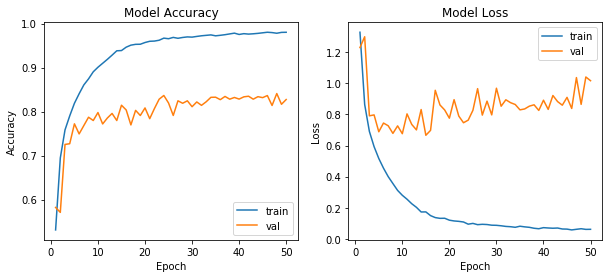

In [0]:
# plot model history
plot_model_history(model_info)